In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [80]:
!gpg --batch --yes --passphrase 'ASK_GALQIWI_FOR_PASSPHRASE' --output plots_data.tar.gz -d plots_data.tar.gz.gpg && tar xf plots_data.tar.gz

gpg: AES256 encrypted data
gpg: encrypted with 1 passphrase
gpg: decryption failed: Bad session key


In [81]:
noise_data_df = pd.read_csv('./noise_data/wandb_export_2024-08-15T05_04_22.552+03_00.csv')

noise_data_df = noise_data_df[['Name', 'State', 'wikitext2', 'noise_level']]
noise_data_df['noise_level'] = noise_data_df['noise_level'] ** 2
noise_data_df['effective_wbits'] = - np.log(noise_data_df['noise_level']) / np.log(4)
noise_data_df = noise_data_df[noise_data_df['State'] == 'finished']
print(set(noise_data_df['Name']))
noise_data_df = noise_data_df[noise_data_df['Name'] == 'Meta-Llama-3.1-8B']

{'Llama-2-7b-hf', 'Meta-Llama-3.1-8B'}


In [82]:
import numpy as np
import math
import pandas as pd
import os
import json

eden_data_prefix = './eden_data/wandb'
eden_data_suffix = './files/wandb-summary.json'

eden_data = []
for run in os.listdir(eden_data_prefix):
    if not os.path.isfile(os.path.join(eden_data_prefix, run, eden_data_suffix)):
        continue
    with open(os.path.join(eden_data_prefix, run, eden_data_suffix)) as file:
        eden_data.append(json.load(file))

eden_data_df = pd.DataFrame(eden_data)
eden_data_df = eden_data_df[~eden_data_df['wikitext2_PPL'].isna()]
eden_data_df = eden_data_df[~eden_data_df['expected_mse'].isna()]
eden_data_df = eden_data_df[eden_data_df['expected_mse'] < 4 ** (-1)]
eden_data_df = eden_data_df[eden_data_df['expected_mse'] > 4 ** (-4)]
eden_data_df = eden_data_df[['wikitext2_PPL', 'expected_mse']]
eden_data_df['effective_wbits'] = - np.log(eden_data_df['expected_mse']) / np.log(4)

(5.0, 20.0)

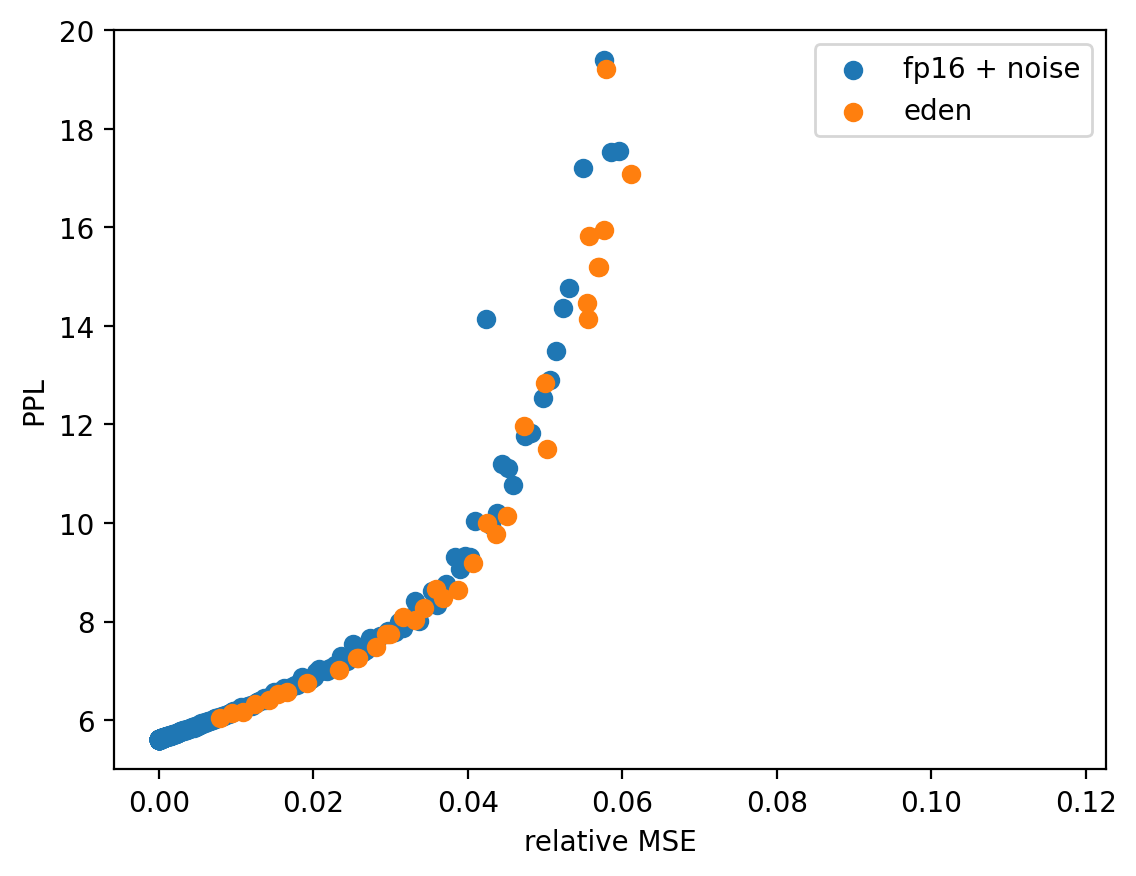

In [83]:
plt.scatter(noise_data_df['noise_level'], noise_data_df['wikitext2'], label='fp16 + noise')
plt.scatter(eden_data_df['expected_mse'], eden_data_df['wikitext2_PPL'], label='eden')
plt.legend()
plt.ylabel('PPL')
plt.xlabel('relative MSE')
plt.ylim([5, 20])
# plt.savefig('mse.png')

(5.0, 20.0)

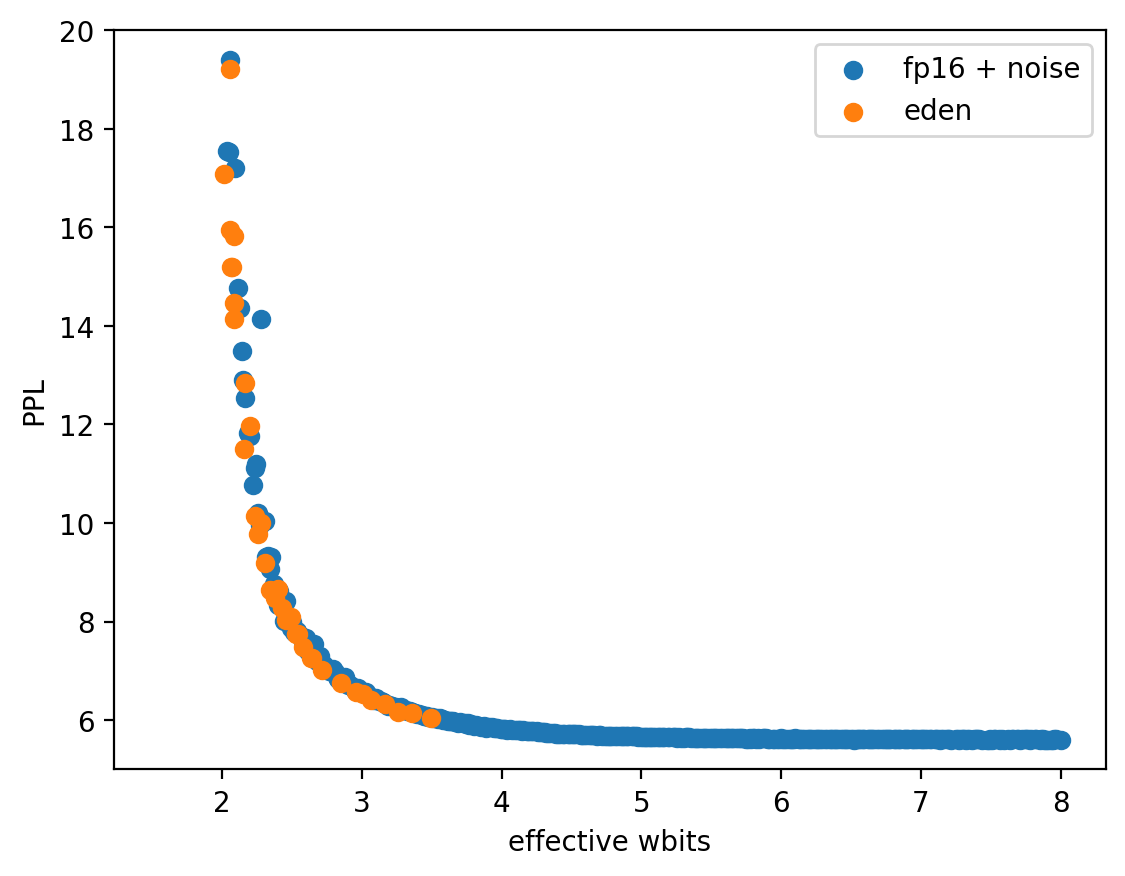

In [84]:
plt.scatter(noise_data_df['effective_wbits'], noise_data_df['wikitext2'], label='fp16 + noise')
plt.scatter(eden_data_df['effective_wbits'], eden_data_df['wikitext2_PPL'], label='eden')
plt.ylabel('PPL')
plt.xlabel('effective wbits')
plt.legend()
plt.ylim([5, 20])
# plt.savefig('wbits.png')